In [29]:
%%javascript 
IPython.OutputArea.prototype._should_scroll = function(lines) {    return false;   }

<IPython.core.display.Javascript object>

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv1D,BatchNormalization


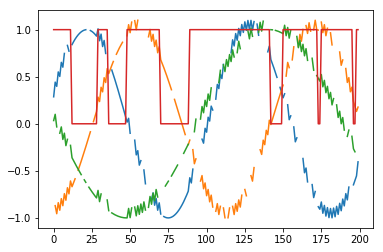

In [31]:
# defining dataset
# 3 sequences
# possible missing data
# modulated in some places
#
# 50 samples
# cycles can be 1 - 4
# offset can be any
# phase offset can be zero, 120, 240
sz=200
t=np.linspace(0,2*np.pi,sz)
def generate(c,o):
    return np.sin(t*c+o)

a=generate(2,0)
b=generate(2,2*np.pi/3)
c=generate(2,4*np.pi/3)

def makedatum():
    mod=np.zeros(sz)
    mod[0]=np.random.randint(2)
    for i in range(1,sz):
        mod[i]=mod[i-1] if np.random.rand()>0.05 else 1-mod[i-1]
        
    z=np.zeros((sz,6))
    hf=np.ones(sz)*10 #np.sin(t*(20+np.random.rand()*5)+np.random.rand()*2*np.pi)
    hf=np.array(range(sz))%2
    for i in [0,1,2]:
        c=np.random.rand()*2+1
        o=np.random.rand()*2*np.pi
        z[:,i]=np.sin(t*c+o)+hf*0.1*mod
    z[:,3:6]=np.random.randint(5,size=(sz,3))
    for i in [0,1,2]:
        z[z[:,3+i]==0,i]=0
        z[z[:,3+i]>0,3+i]=1
    return z ,mod       

q,mod=makedatum()
for i in [0,1,2]:
        q[q[:,3+i]==0,i]=np.nan
plt.plot(q[:,0])
plt.plot(q[:,1])
plt.plot(q[:,2])
plt.plot(mod)


In [45]:
xtrain=np.zeros((1000,sz,6))
ytrain=np.zeros((1000,sz,1))
for i in range(1000):
    x,y=makedatum()
    ytrain[i]=y.reshape(sz,-1)
    xtrain[i,:]=x.reshape(sz,-1)
    


In [69]:
model = Sequential()
model.add(Conv1D(10, 7, activation='relu', padding="same", input_shape=(sz,6)))
model.add(Conv1D(10, 3, activation='relu', padding="same", input_shape=(sz,6)))
model.add(BatchNormalization())
model.add(Dense(int(32), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 200, 10)           430       
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 200, 10)           310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 10)           40        
_________________________________________________________________
dense_32 (Dense)             (None, 200, 32)           352       
_________________________________________________________________
dense_33 (Dense)             (None, 200, 1)            33        
Total params: 1,165
Trainable params: 1,145
Non-trainable params: 20
_________________________________________________________________


In [70]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(xtrain, ytrain, epochs=100, batch_size=32)


Epoch 1/100
1000/1000 [==============================] - 1s 693us/step - loss: 0.7056 - acc: 0.5019
Epoch 2/100
1000/1000 [==============================] - 0s 348us/step - loss: 0.6941 - acc: 0.5097
Epoch 3/100
1000/1000 [==============================] - 0s 335us/step - loss: 0.6930 - acc: 0.5118
Epoch 4/100
1000/1000 [==============================] - 0s 378us/step - loss: 0.6925 - acc: 0.5154
Epoch 5/100
1000/1000 [==============================] - 0s 327us/step - loss: 0.6922 - acc: 0.5185
Epoch 6/100
1000/1000 [==============================] - 0s 321us/step - loss: 0.6920 - acc: 0.5166
Epoch 7/100
1000/1000 [==============================] - 0s 332us/step - loss: 0.6917 - acc: 0.5202
Epoch 8/100
1000/1000 [==============================] - 0s 323us/step - loss: 0.6914 - acc: 0.5208
Epoch 9/100
1000/1000 [==============================] - 0s 333us/step - loss: 0.6910 - acc: 0.5236
Epoch 10/100
1000/1000 [==============================] - 0s 339us/step - loss: 0.6908 - acc: 0.5236

1000/1000 [==============================] - 0s 327us/step - loss: 0.2040 - acc: 0.9137
Epoch 83/100
1000/1000 [==============================] - 0s 321us/step - loss: 0.2009 - acc: 0.9145
Epoch 84/100
1000/1000 [==============================] - 0s 332us/step - loss: 0.2015 - acc: 0.9149
Epoch 85/100
1000/1000 [==============================] - 0s 327us/step - loss: 0.1998 - acc: 0.9149
Epoch 86/100
1000/1000 [==============================] - 0s 381us/step - loss: 0.1994 - acc: 0.9158
Epoch 87/100
1000/1000 [==============================] - 0s 343us/step - loss: 0.1972 - acc: 0.9169
Epoch 88/100
1000/1000 [==============================] - 0s 322us/step - loss: 0.1951 - acc: 0.9179
Epoch 89/100
1000/1000 [==============================] - 0s 324us/step - loss: 0.1959 - acc: 0.9175
Epoch 90/100
1000/1000 [==============================] - 0s 329us/step - loss: 0.1937 - acc: 0.9183
Epoch 91/100
1000/1000 [==============================] - 0s 335us/step - loss: 0.1945 - acc: 0.9177
Epo

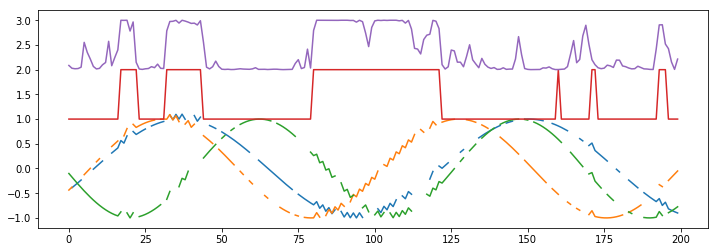

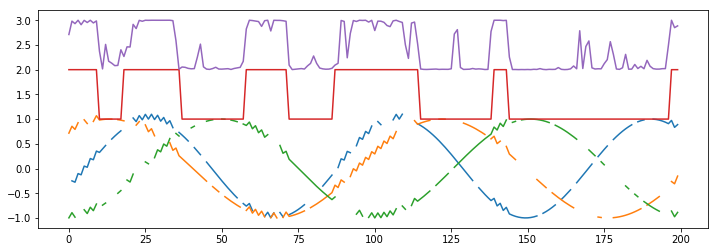

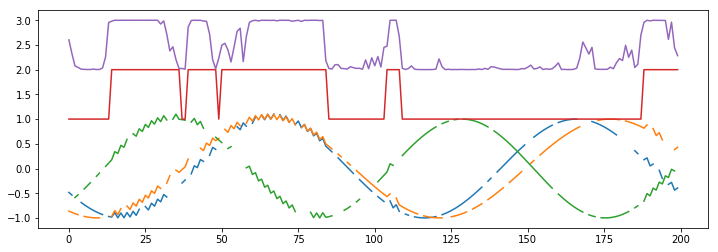

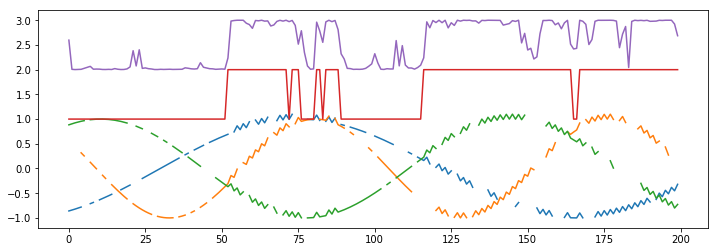

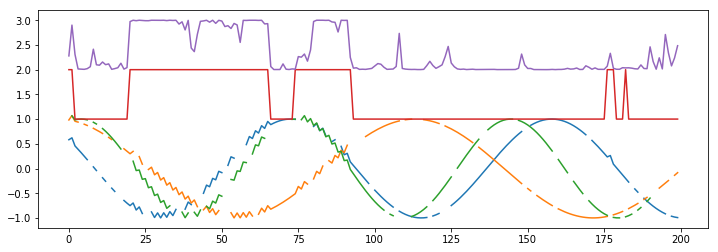

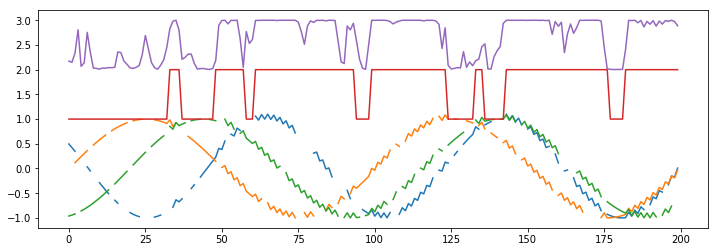

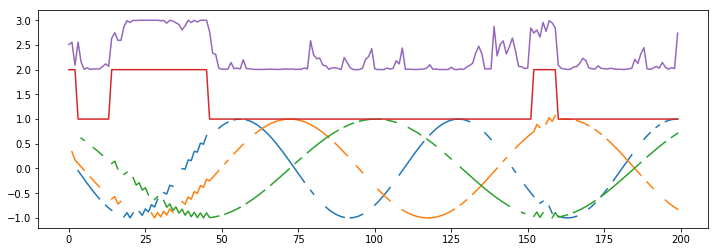

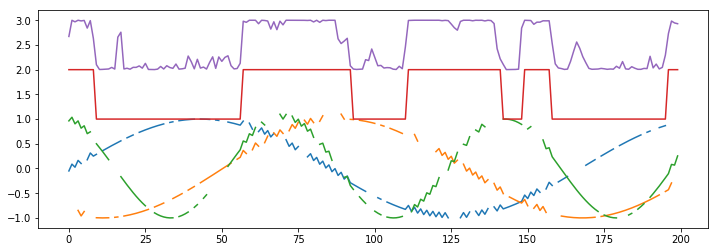

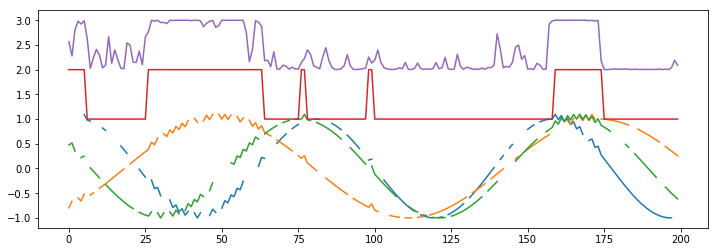

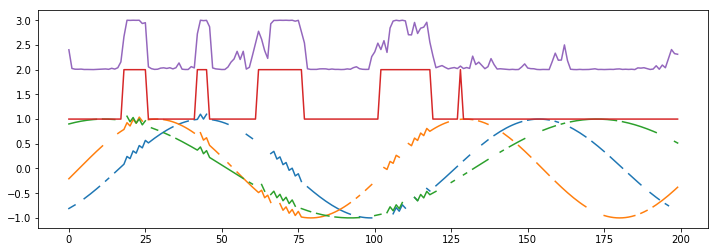

In [71]:
yout=model.predict(xtrain[:10,:])
for i in range(10):
    fig=plt.figure(figsize=(12,4))
    q=(xtrain[i,:]+0).reshape(sz,6)
    mod=ytrain[i]+1
    modpred=yout[i]+2
    for i in [0,1,2]:
        q[q[:,3+i]==0,i]=np.nan
    plt.plot(q[:,0])
    plt.plot(q[:,1])
    plt.plot(q[:,2]) 
    plt.plot(mod)
    plt.plot(modpred)
    plt.show


In [43]:
xtest=np.zeros((1000,sz*6))
ytest=np.zeros((1000,sz))
for i in range(10):
    x,y=makedatum()
    ytest[i]=y
    xtest[i,:]=x.ravel()

In [34]:
ytest[:10]

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [21]:
model.evaluate(xtest,ytest,batch_size=32)

1000/1000 [==============================] - 0s 32us/step


[0.039556739062070849, 0.995]